<a href="https://colab.research.google.com/github/rohitkrishna03/Books/blob/master/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [9]:
import pandas as pd


In [10]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df = df.drop('id',axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
categorical_features =['gender','hypertension','ever_married','work_type','heart_disease','Residence_type','smoking_status','stroke']
unique_values ={col:df[col].unique() for col in categorical_features}

In [12]:
for col, values in unique_values.items():
  print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
heart_disease: [1 0]
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [13]:
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [14]:
y = df['stroke']
y.value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


In [15]:
import plotly.express as px
px.bar(x=y.value_counts().index,y=y.value_counts(),color=y.value_counts().index)

In [16]:
numerical_features =['age','avg_glucose_level','bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

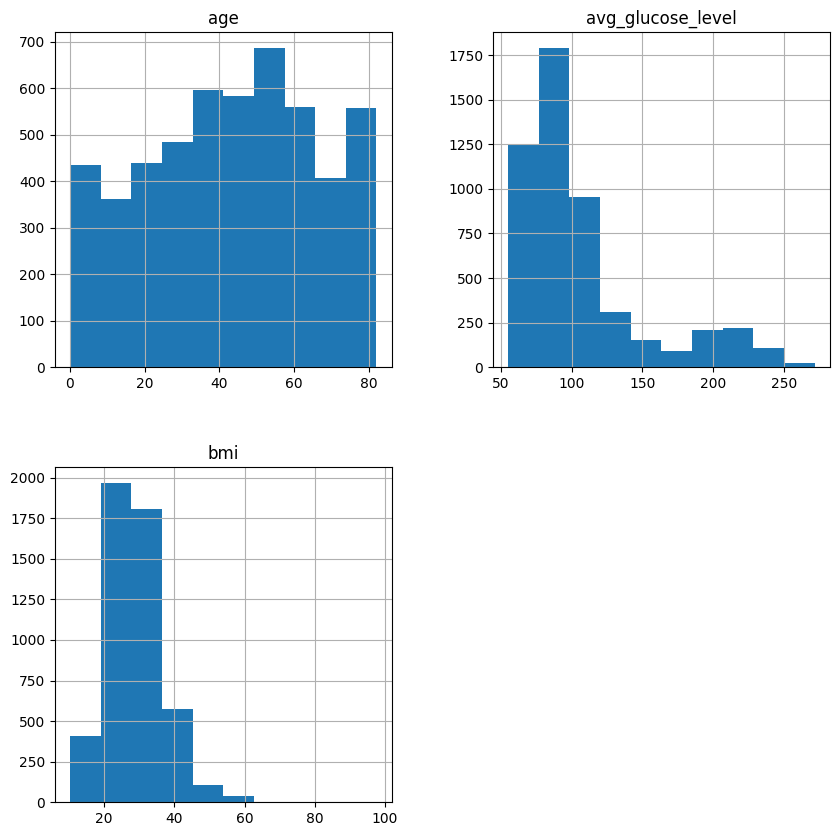

In [17]:
df[numerical_features].hist(figsize=(10,10))


In [18]:
fig = px.histogram(df, x='gender',width =400)
fig.show()

In [19]:
df[df['gender']=='Male']['stroke'].mean()*100

np.float64(5.106382978723404)

In [20]:
fig = px.histogram(df, x ='hypertension',width=400)
fig.show()

In [21]:
round(df[df['heart_disease']==0]['stroke'].mean()*100,2)

np.float64(4.18)

In [22]:
fig = px.histogram(df, x ='ever_married', width= 400)
fig.show()

In [23]:
round(df[df['ever_married']=='Yes']['stroke'].mean()*100,2)

np.float64(6.56)

In [24]:
fig = px.histogram(df, x ='work_type',width=400)
fig.show()

In [25]:
stroke_percentage_work_type = df.groupby('work_type')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

,stroke
work_type,
Self-employed,7.936508
Private,5.094017
Govt_job,5.022831
children,0.291121
Never_worked,0.000000


In [26]:
fig = px.histogram(df, x = 'Residence_type',width=400)
fig.show()

In [27]:
fig = px.histogram(df, x = 'smoking_status', width=400)
fig.show()

In [28]:
stroke_percentage_work_type = df.groupby('Residence_type')['stroke'].mean()*100
stroke_percentage_work_type.sort_values(ascending=False)

,stroke
Residence_type,
Urban,5.200308
Rural,4.534606


In [29]:
stroke_percentage_smoking_status = df.groupby('smoking_status')['stroke'].mean()*100
stroke_percentage_smoking_status.sort_values(ascending=False)

,stroke
smoking_status,
formerly smoked,7.909605
smokes,5.323194
never smoked,4.756871
Unknown,3.044041


In [30]:
from sklearn.metrics import mutual_info_score
categorical_features=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for col in categorical_features:
  mi = mutual_info_score(df[col],df['stroke'])
  print(f"{col}: {mi:.2f}")

gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00


In [32]:
df[numerical_features+['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000
